In [66]:
import tensorflow
print(tensorflow.__version__)

2.6.0


In [67]:
import os
input_path = "C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/"

In [68]:
categories=os.listdir(input_path)
labels=[i for i in range(len(categories))]

In [69]:
print(labels)

[0, 1]


In [70]:
label_dict=dict(zip(categories,labels)) #empty dictionary


In [71]:
print(label_dict)
print(categories)
print(labels)


{'car': 0, 'cat': 1}
['car', 'cat']
[0, 1]


In [72]:
import cv2

In [73]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(input_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        print(img_path)
        
        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image


C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\car1.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\car2.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\car3.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\car4.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\car5.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/car\carr.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat1.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat2.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat3.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat4.jpg
C:/Users/DK/Desktop/upgrad/handon/cnn/image/input/cat\cat5.jpg


In [74]:
print(data)

[array([[[ 36,  94,  83],
        [ 48, 108,  97],
        [ 52, 118, 112],
        ...,
        [ 20,  40,  29],
        [ 25,  39,  23],
        [148, 119,  50]],

       [[ 37,  70,  52],
        [ 38,  81,  65],
        [ 37,  77,  65],
        ...,
        [ 21,  27,  15],
        [ 23,  37,  25],
        [153, 124,  55]],

       [[ 28,  37,  17],
        [ 27,  46,  27],
        [ 38,  66,  46],
        ...,
        [ 70,  77,  47],
        [ 44,  35,  17],
        [151, 123,  58]],

       ...,

       [[137, 147, 148],
        [138, 148, 148],
        [132, 141, 144],
        ...,
        [138, 149, 163],
        [141, 152, 166],
        [141, 150, 164]],

       [[135, 144, 147],
        [131, 140, 143],
        [137, 146, 150],
        ...,
        [137, 149, 161],
        [140, 153, 167],
        [140, 152, 164]],

       [[133, 143, 143],
        [137, 149, 154],
        [139, 148, 151],
        ...,
        [136, 147, 161],
        [137, 149, 161],
        [139, 149, 158]

In [75]:
print(target)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


In [76]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [77]:
print(data.shape[0])

12


In [78]:
print(target)

[0 0 0 0 0 0 1 1 1 1 1 1]


In [79]:
print(data)

[[[[0.14117647 0.36862745 0.3254902 ]
   [0.18823529 0.42352941 0.38039216]
   [0.20392157 0.4627451  0.43921569]
   ...
   [0.07843137 0.15686275 0.11372549]
   [0.09803922 0.15294118 0.09019608]
   [0.58039216 0.46666667 0.19607843]]

  [[0.14509804 0.2745098  0.20392157]
   [0.14901961 0.31764706 0.25490196]
   [0.14509804 0.30196078 0.25490196]
   ...
   [0.08235294 0.10588235 0.05882353]
   [0.09019608 0.14509804 0.09803922]
   [0.6        0.48627451 0.21568627]]

  [[0.10980392 0.14509804 0.06666667]
   [0.10588235 0.18039216 0.10588235]
   [0.14901961 0.25882353 0.18039216]
   ...
   [0.2745098  0.30196078 0.18431373]
   [0.17254902 0.1372549  0.06666667]
   [0.59215686 0.48235294 0.22745098]]

  ...

  [[0.5372549  0.57647059 0.58039216]
   [0.54117647 0.58039216 0.58039216]
   [0.51764706 0.55294118 0.56470588]
   ...
   [0.54117647 0.58431373 0.63921569]
   [0.55294118 0.59607843 0.65098039]
   [0.55294118 0.58823529 0.64313725]]

  [[0.52941176 0.56470588 0.57647059]
   [0.5

In [80]:
print(new_target)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [81]:
new_target.shape


(12, 2)

In [82]:
data.shape

(12, 100, 100, 3)

In [83]:
data.shape

(12, 100, 100, 3)

In [84]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(12,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(12,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers


model.add(Conv2D(12,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(12,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 98, 98, 12)        336       
_________________________________________________________________
activation_15 (Activation)   (None, 98, 98, 12)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 12)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 47, 47, 12)        1308      
_________________________________________________________________
activation_16 (Activation)   (None, 47, 47, 12)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 12)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 12)       

In [86]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)


In [87]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)


Epoch 1/200
1/1 [==============================] - 1s 520ms/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.7075 - val_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 61ms/step - loss: 0.7232 - accuracy: 0.5000 - val_loss: 0.6992 - val_accuracy: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 63ms/step - loss: 0.6842 - accuracy: 0.5000 - val_loss: 0.6880 - val_accuracy: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 59ms/step - loss: 0.6224 - accuracy: 0.6250 - val_loss: 0.6774 - val_accuracy: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 65ms/step - loss: 0.6664 - accuracy: 0.5000 - val_loss: 0.6693 - val_accuracy: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 66ms/step - loss: 0.7269 - accuracy: 0.5000 - val_loss: 0.6653 - val_accuracy: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 74ms/step - loss: 0.7264 - accuracy: 0.3750 - val_loss: 0.6655 - val_accuracy: 0.5000
Epoch 8/200
1/1 [==

1/1 [==============================] - 0s 64ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 60/200
1/1 [==============================] - 0s 71ms/step - loss: 3.6642e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 61/200
1/1 [==============================] - 0s 69ms/step - loss: 5.0464e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 62/200
1/1 [==============================] - 0s 68ms/step - loss: 7.4955e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 63/200
1/1 [==============================] - 0s 60ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.8733e-04 - val_accuracy: 1.0000
Epoch 64/200
1/1 [==============================] - 0s 61ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 9.0606e-04 - val_accuracy: 1.0000
Epoch 65/200
1/1 [==============================] - 0s 65ms/step - loss: 2.3718e-04 - accuracy: 1.0000 - val_loss: 8.3109e-04 - val_accuracy: 1.000

Epoch 115/200
1/1 [==============================] - 0s 61ms/step - loss: 2.9238e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 116/200
1/1 [==============================] - 0s 56ms/step - loss: 4.7161e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 117/200
1/1 [==============================] - 0s 61ms/step - loss: 1.5724e-04 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 118/200
1/1 [==============================] - 0s 64ms/step - loss: 1.1452e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 119/200
1/1 [==============================] - 0s 63ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 120/200
1/1 [==============================] - 0s 59ms/step - loss: 2.2075e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 121/200
1/1 [==============================] - 0s 63ms/step - loss: 3.0102e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val

Epoch 171/200
1/1 [==============================] - 0s 67ms/step - loss: 5.6143e-05 - accuracy: 1.0000 - val_loss: 7.3927e-04 - val_accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 69ms/step - loss: 7.9149e-05 - accuracy: 1.0000 - val_loss: 7.2945e-04 - val_accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 74ms/step - loss: 1.9839e-04 - accuracy: 1.0000 - val_loss: 7.2956e-04 - val_accuracy: 1.0000
Epoch 174/200
1/1 [==============================] - 0s 70ms/step - loss: 4.6890e-05 - accuracy: 1.0000 - val_loss: 7.2831e-04 - val_accuracy: 1.0000
Epoch 175/200
1/1 [==============================] - 0s 57ms/step - loss: 3.8011e-05 - accuracy: 1.0000 - val_loss: 7.2790e-04 - val_accuracy: 1.0000
Epoch 176/200
1/1 [==============================] - 0s 60ms/step - loss: 5.7171e-04 - accuracy: 1.0000 - val_loss: 6.9391e-04 - val_accuracy: 1.0000
Epoch 177/200
1/1 [==============================] - 0s 65ms/step - loss: 6.2625e-05 - accuracy: 1.0

In [88]:
model.save('model.h5')


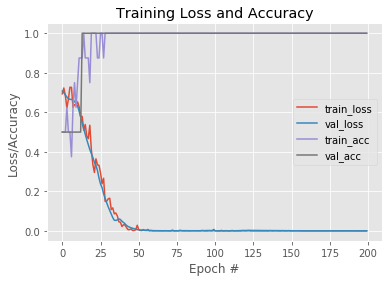

In [89]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")